In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw

In [2]:
tweets_file = 'data/ethiopia_4e3.json'

tweets_data = []
tweets_file = open(tweets_file, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

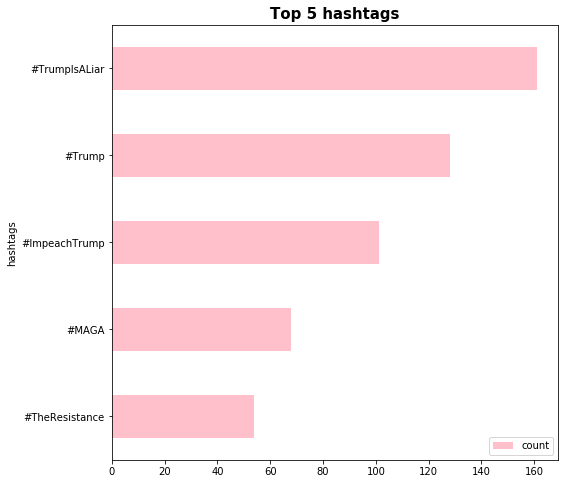

In [17]:
import re
def get_hashtags(text):
    return re.findall(r'\B#\w*[a-zA-Z]+\w*', text)
hashtags=[]
for tweet in range(0,len(tweets_data)):
    try:
        hashtags.extend(get_hashtags(tweets_data[tweet]['text']))
        hashtags.extend(get_hashtags(tweets_data[tweet]['retweeted_status']['text']))
    except:
        pass
counts_no_hashtags = collections.Counter(hashtags)
top_hashtags = pd.DataFrame(counts_no_hashtags.most_common(5),columns=['hashtags', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
top_hashtags.sort_values(by='count').plot.barh(x='hashtags',
                      y='count',
                      ax=ax,
                      color="pink")

ax.set_title("Top 5 hashtags",fontsize=15, fontweight='bold')

plt.show()

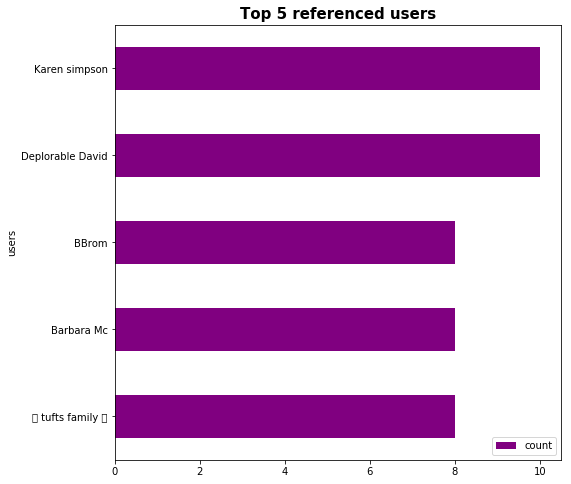

In [18]:
all_user_in_tweet=[]
for tweet in range(0,len(tweets_data)):
    try:
        all_user_in_tweet.append(tweets_data[tweet]['user']['name'])
    except KeyError:
        pass
counts_no_users = collections.Counter(all_user_in_tweet)
top_referenced_users = pd.DataFrame(counts_no_users.most_common(5),columns=['users', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
top_referenced_users.sort_values(by='count').plot.barh(x='users',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Top 5 referenced users",fontsize=15, fontweight='bold')

plt.show()

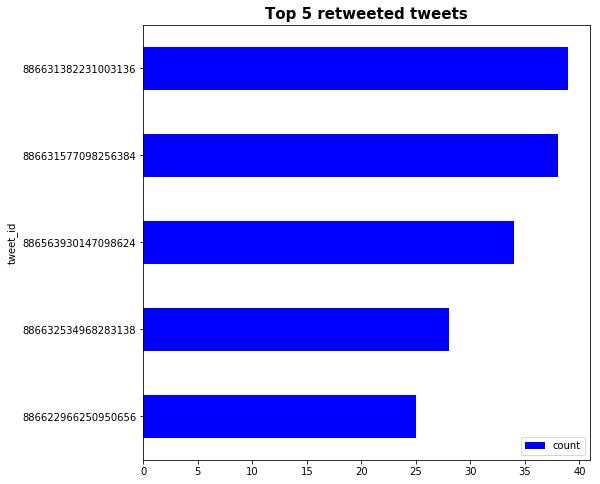

In [19]:
retweeted_tweets=[]
for tweet in range(0,len(tweets_data)):
    try:
        retweeted_tweets.append(tweets_data[tweet]['retweeted_status']['id'])
    except KeyError:
        pass

most_retweeted_tweets = collections.Counter(retweeted_tweets)
most_retweeted_tweets = pd.DataFrame(most_retweeted_tweets.most_common(5),columns=['tweet_id', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
most_retweeted_tweets.sort_values(by='count').plot.barh(x='tweet_id',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Top 5 retweeted tweets",fontsize=15, fontweight='bold')

plt.show()